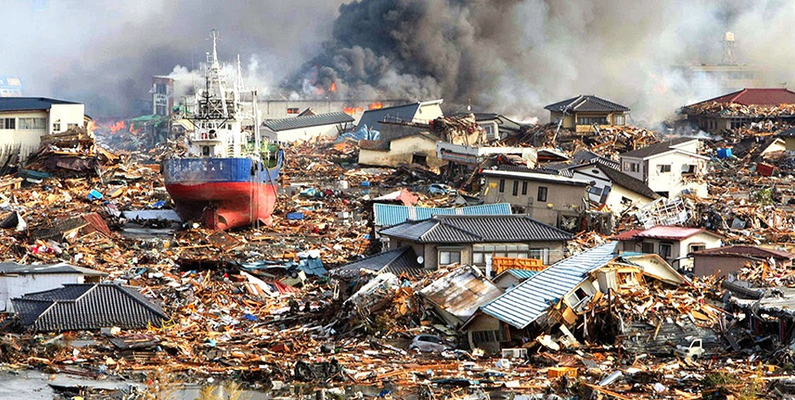

# Disaster Management in 2024

Data source: https://www.kaggle.com/datasets/umeradnaan/prediction-of-disaster-management-in-2024

## Overview

The dataset provides essential details about each event, including disaster type, location, magnitude, date, fatalities, and economic damages, by simulating natural disaster occurrences in 2024. It has about 10,000 records and is about 300 KB in size.

Columns description:

* Disaster_ID: A special number assigned to every calamity.

* Disaster_Type: Category (e.g., Flood, Fire, Earthquake).

* Location: The nation where the catastrophe happened.

* Magnitude: The disaster's intensity (scale of 1.0 to 10.0).

* Date: The event's timestamp.

* Fatalities: The total number of people killed by the calamity.

* Economic_Loss($): Damage to finances expressed in US dollars.

This notebook is based on Machine Learning and it's containing three parts (Data analysis and visualization, Data preprocessing, Modeling and evaluating). 

## Part 1

### Data analysis and visualization

#### Main tool: Pandas, Power-BI

In [30]:
# Import necessaries
from pandas import read_csv , get_dummies , DataFrame , concat , plotting
from matplotlib.pyplot import show
from pickle import dump
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor , ExtraTreesRegressor , GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

# Instance from 'StandardScaler' object
scaler = StandardScaler()

In [31]:
# File loading
try:
    file = read_csv('natural_disasters_2024.csv')
    df = file.copy()
except:
    print('Error when reading the csv file!')

In [32]:
df.sample(10)

,Disaster_ID,Disaster_Type,Location,Magnitude,Date,Fatalities,Economic_Loss($)
3530,3531,Hurricane,USA,4.887058,2024-05-27 02:00:00,990,6.644689e+08
6455,6456,Tornado,Japan,4.431896,2024-09-25 23:00:00,7630,7.194422e+07
2008,2009,Earthquake,Japan,1.238353,2024-03-24 16:00:00,4844,1.131452e+08
2959,2960,Tornado,Brazil,1.078593,2024-05-03 07:00:00,5555,7.646387e+08
9267,9268,Earthquake,Indonesia,8.259792,2025-01-21 03:00:00,1080,5.515671e+08
235,236,Flood,Indonesia,6.388457,2024-01-10 19:00:00,6701,2.069520e+08
5332,5333,Hurricane,India,5.412114,2024-08-10 04:00:00,9296,5.918816e+08
8773,8774,Earthquake,Brazil,1.568677,2024-12-31 13:00:00,2601,2.664689e+08
2833,2834,Wildfire,China,3.207253,2024-04-28 01:00:00,7274,5.761233e+08
2170,2171,Flood,China,3.265571,2024-03-31 10:00:00,889,3.419817e+08


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Disaster_ID       10000 non-null  int64  
 1   Disaster_Type     10000 non-null  object 
 2   Location          10000 non-null  object 
 3   Magnitude         10000 non-null  float64
 4   Date              10000 non-null  object 
 5   Fatalities        10000 non-null  int64  
 6   Economic_Loss($)  10000 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 547.0+ KB


In [34]:
df.describe()

,Disaster_ID,Magnitude,Fatalities,Economic_Loss($)
count,10000.00000,10000.000000,10000.000000,1.000000e+04
mean,5000.50000,5.559173,4984.928900,5.049752e+08
std,2886.89568,2.619304,2900.114029,2.861325e+08
min,1.00000,1.000656,0.000000,1.036597e+06
25%,2500.75000,3.263217,2481.750000,2.636352e+08
50%,5000.50000,5.589578,4947.000000,5.078407e+08
75%,7500.25000,7.829268,7511.250000,7.527256e+08
max,10000.00000,9.999671,9999.000000,9.998528e+08


In [35]:
# Find count of null data
df.isnull().sum()

Disaster_ID         0
Disaster_Type       0
Location            0
Magnitude           0
Date                0
Fatalities          0
Economic_Loss($)    0
dtype: int64

In [36]:
# Find count of duplicated data
df.duplicated().sum()

0

#### Visualization on disaster type and location using Power-BI tools

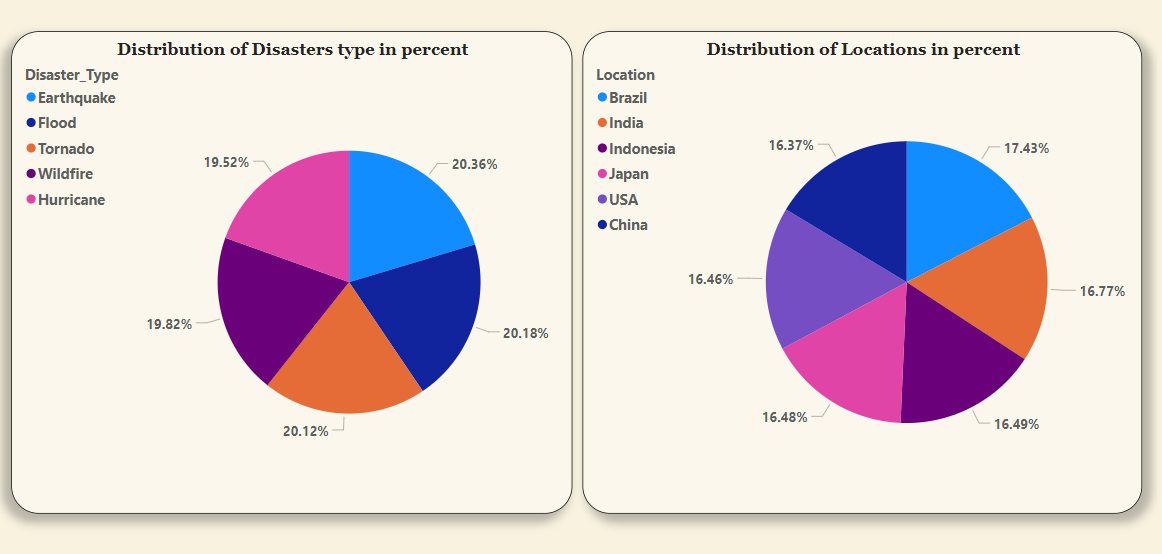

#### Visualization on economic loss using Power-BI tools

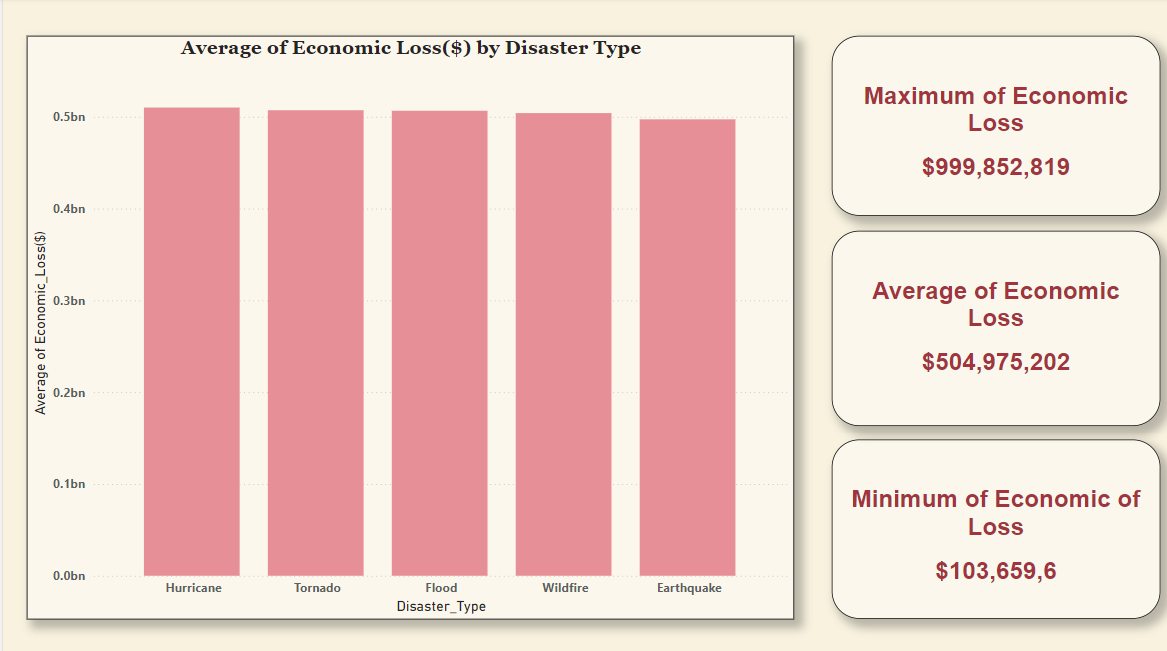

#### Visualization on fatalities using Power-BI tools

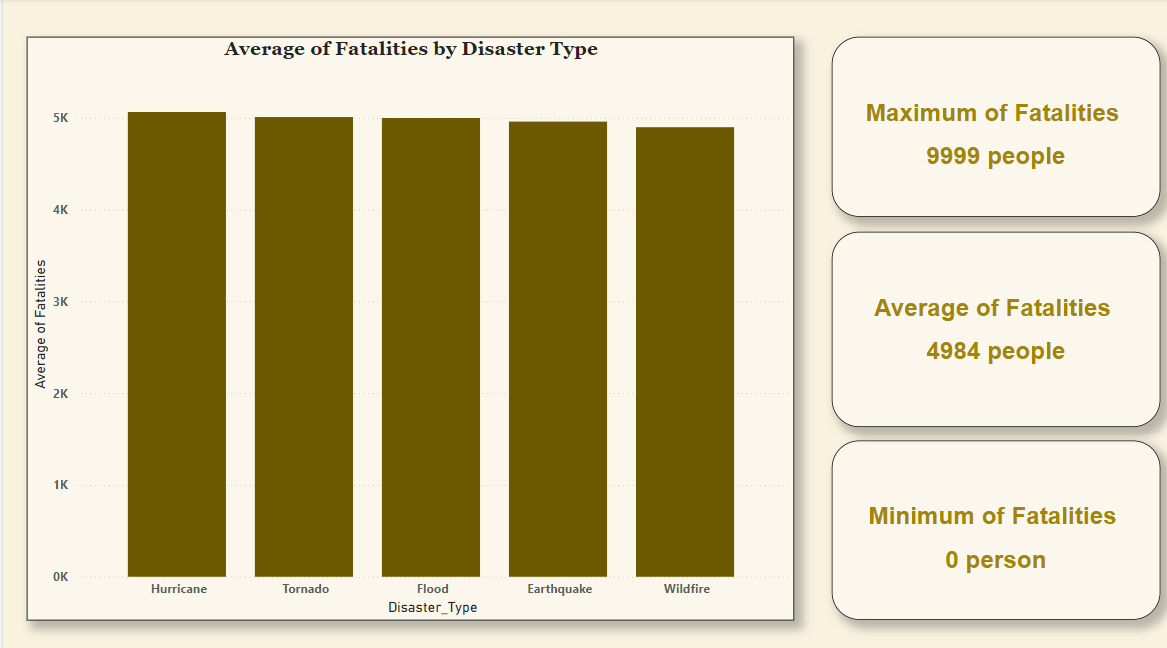

##### Disaster with most economic loss:

In [37]:
max_EL = df[df['Economic_Loss($)']==df['Economic_Loss($)'].max()]
max_EL

,Disaster_ID,Disaster_Type,Location,Magnitude,Date,Fatalities,Economic_Loss($)
8665,8666,Wildfire,Japan,2.255577,2024-12-27 01:00:00,8797,9.998528e+08


##### Disaster with least economic loss:

In [38]:
min_EL = df[df['Economic_Loss($)']==df['Economic_Loss($)'].min()]
min_EL

,Disaster_ID,Disaster_Type,Location,Magnitude,Date,Fatalities,Economic_Loss($)
8460,8461,Wildfire,Japan,4.112006,2024-12-18 12:00:00,9106,1.036597e+06


##### Disaster with most Fatalities:

In [39]:
max_fa = df[df['Fatalities']==df['Fatalities'].max()]
max_fa

,Disaster_ID,Disaster_Type,Location,Magnitude,Date,Fatalities,Economic_Loss($)
5904,5905,Earthquake,Japan,4.837283,2024-09-03 00:00:00,9999,8.698903e+08


##### Disaster with least Fatalities:

In [40]:
min_fa = df[df['Fatalities']==df['Fatalities'].min()]
min_fa

,Disaster_ID,Disaster_Type,Location,Magnitude,Date,Fatalities,Economic_Loss($)
3246,3247,Flood,Brazil,5.907295,2024-05-15 06:00:00,0,3.686269e+08
5269,5270,Earthquake,China,1.916248,2024-08-07 13:00:00,0,4.931710e+07
5844,5845,Tornado,China,4.356929,2024-08-31 12:00:00,0,9.014147e+08
9831,9832,Earthquake,India,6.724677,2025-02-13 15:00:00,0,5.127636e+08


## Part 2

### Data preprcessing

#### Pandas, Matplotlib, Scikit-learn

In [41]:
# Separate labels and categorical columns
label = df['Economic_Loss($)']
Location_Disaster_Type = df[['Disaster_Type','Location']]

# Make a new column from Date and convert it to months
new_date = DataFrame([int(d.split('-')[1]) for d in df.Date],columns=['Month'])

In [42]:
# Remove label, categorical, Data and unnecessary columns from dataframe
df = df.drop(['Economic_Loss($)','Disaster_ID','Disaster_Type','Location','Date'],axis=1)

In [43]:
# Find correlation coefficient
df['Loss'] = label
Corr = df.corr()
Corr['Loss'].sort_values(ascending=False)

Loss          1.000000
Fatalities    0.008628
Magnitude    -0.003289
Name: Loss, dtype: float64

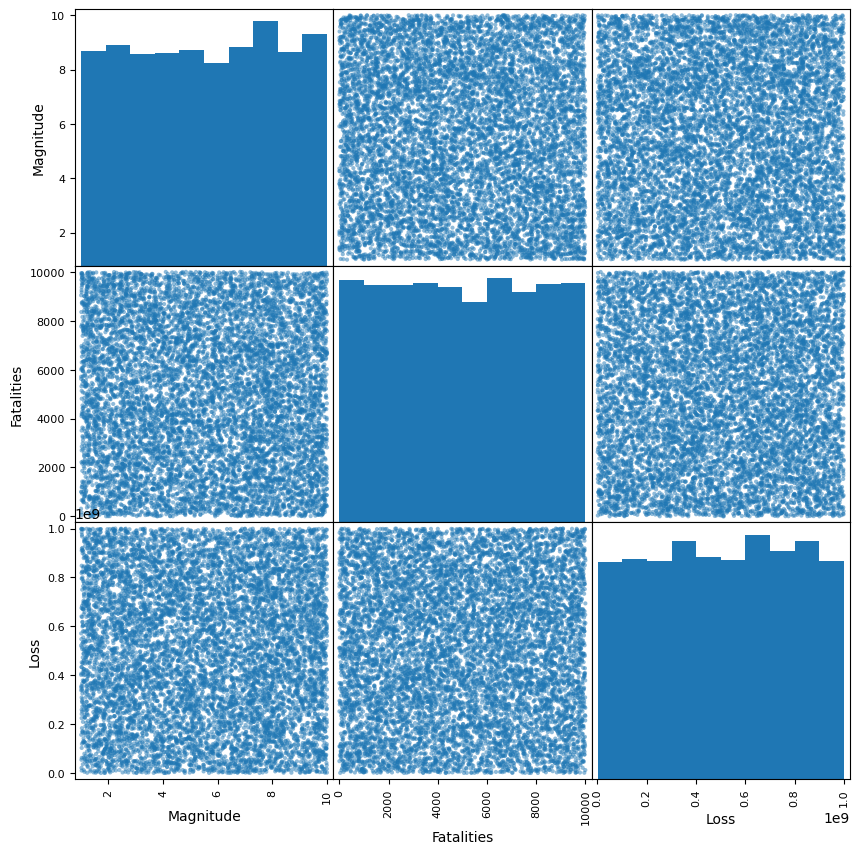

In [44]:
# Have a visualize on correlation coefficient
plotting.scatter_matrix(df,figsize=(10,10))
show()

#### According the numbers and scatter plots there is no efficient correlation between economic loss and magnitude and fatalities

In [45]:
df = df.drop(['Loss'],axis=1)

In [46]:
# Merging numeric data with new date column
df = concat([df,new_date],axis=1)

In [47]:
# Scale numeric data
scaled_df = DataFrame(scaler.fit_transform(df),columns=df.columns)
scaled_df.describe()

,Magnitude,Fatalities,Month
count,1.000000e+04,1.000000e+04,1.000000e+04
mean,6.608047e-17,3.836931e-17,6.821210e-17
std,1.000050e+00,1.000050e+00,1.000050e+00
min,-1.740442e+00,-1.718959e+00,-1.341090e+00
25%,-8.765957e-01,-8.631744e-01,-1.066861e+00
50%,1.160874e-02,-1.307907e-02,3.005551e-02
75%,8.667220e-01,8.711545e-01,8.527429e-01
max,1.695382e+00,1.729009e+00,1.675430e+00


In [48]:
# Encoding categorical data by One-Hot encoding method
encoded_df = get_dummies(Location_Disaster_Type)

In [49]:
# Make a final dataframe from scaled numeric data and encoded data
final_df = concat([scaled_df,encoded_df],axis=1)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Magnitude                 10000 non-null  float64
 1   Fatalities                10000 non-null  float64
 2   Month                     10000 non-null  float64
 3   Disaster_Type_Earthquake  10000 non-null  bool   
 4   Disaster_Type_Flood       10000 non-null  bool   
 5   Disaster_Type_Hurricane   10000 non-null  bool   
 6   Disaster_Type_Tornado     10000 non-null  bool   
 7   Disaster_Type_Wildfire    10000 non-null  bool   
 8   Location_Brazil           10000 non-null  bool   
 9   Location_China            10000 non-null  bool   
 10  Location_India            10000 non-null  bool   
 11  Location_Indonesia        10000 non-null  bool   
 12  Location_Japan            10000 non-null  bool   
 13  Location_USA              10000 non-null  bool   
dtypes: bool

In [50]:
final_df.head()

,Magnitude,Fatalities,Month,Disaster_Type_Earthquake,Disaster_Type_Flood,Disaster_Type_Hurricane,Disaster_Type_Tornado,Disaster_Type_Wildfire,Location_Brazil,Location_China,Location_India,Location_Indonesia,Location_Japan,Location_USA
0,0.270398,1.627973,-1.34109,False,False,False,False,True,True,False,False,False,False,False
1,0.416232,-0.948951,-1.34109,False,False,True,False,False,False,False,False,True,False,False
2,1.590270,-1.554130,-1.34109,False,False,False,True,False,False,True,False,False,False,False
3,-1.472476,-0.730328,-1.34109,False,True,False,False,False,False,False,True,False,False,False
4,0.900504,-1.451370,-1.34109,False,True,False,False,False,True,False,False,False,False,False


In [51]:
# Splitting data into train and test sets
# 80% of data is considered as train set
xtr , xts , ytr , yts = train_test_split(final_df,label,test_size=0.2,random_state=42)
print(f'Train set size: {len(xtr)} records\nTest set size: {len(xts)} records')

Train set size: 8000 records
Test set size: 2000 records


## Part 3

### Modeling and evaluating

#### Main tools: Scikit-learn, Lightgbm, Catboost, Xgboost, Pandas and Pickle

In [52]:
# Gathering models in a list
models = [LinearRegression,
          RandomForestRegressor,
          ExtraTreesRegressor,
          GradientBoostingRegressor,
          DecisionTreeRegressor,
          KNeighborsRegressor,
          LGBMRegressor,
          CatBoostRegressor,
          XGBRegressor]

results = []
for alg in models:
    carrier = []
    # Train each model on train set and then save the results
    model = alg()
    model.fit(xtr,ytr)
    pred_train = model.predict(xtr)
    pred_test = model.predict(xts)
    carrier.extend([str(model)[:-2],
                    mean_absolute_error(ytr,pred_train),
                    mean_absolute_percentage_error(ytr,pred_train),
                    mean_absolute_error(yts,pred_test),
                    mean_absolute_percentage_error(yts,pred_test)])
    results.append(carrier)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000605 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 545
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 14
[LightGBM] [Info] Start training from score 504381188.943828
Learning rate set to 0.056868
0:	learn: 285257667.3494680	total: 5.56ms	remaining: 5.56s
1:	learn: 285170210.2323195	total: 11.2ms	remaining: 5.58s
2:	learn: 285023290.6849185	total: 16.9ms	remaining: 5.6s
3:	learn: 284941532.1771488	total: 22.3ms	remaining: 5.57s
4:	learn: 284872156.3650456	total: 27.8ms	remaining: 5.53s
5:	learn: 284748826.1909597	total: 33.4ms	remaining: 5.53s
6:	learn: 284684903.1077472	total: 38.8ms	remaining: 5.51s
7:	learn: 284588616.5092980	total: 45.4ms	remaining: 5.63s
8:	learn: 284496691.5971127	total: 50.7ms	remaining: 5.58s
9:	learn: 284406270.4645865	total: 56.2ms	remaining: 5.56s
10:	learn: 284347431.6097438	tota

In [53]:
results = DataFrame(results,columns=['Model','MAE on train set','MAPE on train set','MAE on test set','MAPE on test set'])

In [54]:
results

,Model,MAE on train set,MAPE on train set,MAE on test set,MAPE on test set
0,LinearRegression,2.466803e+08,3.043988e+00,2.510408e+08,3.082627
1,RandomForestRegressor,9.354507e+07,1.129802e+00,2.562592e+08,3.087853
2,ExtraTreesRegressor,5.807847e-07,1.168063e-15,2.679008e+08,3.321319
3,GradientBoostingRegressor,2.402041e+08,2.940541e+00,2.518664e+08,3.044913
4,DecisionTreeRegressor,0.000000e+00,0.000000e+00,3.331900e+08,3.250610
5,KNeighborsRegressor,2.136245e+08,2.539802e+00,2.728929e+08,3.392827
6,LGBMRegressor,2.195173e+08,2.679458e+00,2.533867e+08,3.059724
7,<catboost.core.CatBoostRegressor object at 0x0...,2.066181e+08,2.471875e+00,2.563653e+08,3.150610
8,"XGBRegressor(base_score=None, booster=None, ca...",1.589335e+08,1.886818e+00,2.637098e+08,3.056044


#### It seems DecisionTreeRegressor had the best performance

In [55]:
model = DecisionTreeRegressor()
model.fit(final_df,label)
pred = model.predict(final_df)
print(f'MAE on full data: {mean_absolute_error(label,pred)}')

MAE on full data: 0.0


In [56]:
print(f'MAPE on full data: {mean_absolute_percentage_error(label,pred)}')

MAPE on full data: 0.0


In [57]:
# Save the model
with open('Model.pkl','wb') as file:
    dump(model,file)

# End